# Quantum Random Number Generator

## Import all necessary libraries

In [1]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
import numpy as np
print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
def real_map(value, leftMin, leftMax, rightMin, rightMax):
    # Calculate the spans of the input and output ranges
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Scale the value to the 0-1 range
    valueScaled = (value - leftMin) / leftSpan

    # Map the value to the output range
    mappedValue = rightMin + (valueScaled * rightSpan)

    return mappedValue

0: 84.61538461538461
1: 53.84615384615385
2: 46.15384615384615
3: 53.84615384615385
4: 30.76923076923077
5: 69.23076923076923
6: 69.23076923076923
7: 30.76923076923077
8: 84.61538461538461
9: 53.84615384615385
10: 76.92307692307693
11: 76.92307692307693
12: 84.61538461538461
13: 69.23076923076923
14: 69.23076923076923
15: 53.84615384615385
16: 76.92307692307693
17: 30.76923076923077
18: 61.53846153846154
19: 61.53846153846154
20: 84.61538461538461
21: 84.61538461538461
22: 53.84615384615385
23: 53.84615384615385
24: 76.92307692307693
25: 76.92307692307693
26: 61.53846153846154
27: 69.23076923076923
28: 53.84615384615385
29: 53.84615384615385
30: 61.53846153846154
31: 46.15384615384615
32: 30.76923076923077
33: 84.61538461538461
34: 76.92307692307693
35: 30.76923076923077
36: 84.61538461538461
37: 38.46153846153847
38: 69.23076923076923
39: 76.92307692307693
40: 46.15384615384615
41: 46.15384615384615
42: 38.46153846153847
43: 38.46153846153847
44: 30.76923076923077
45: 84.6153846153846

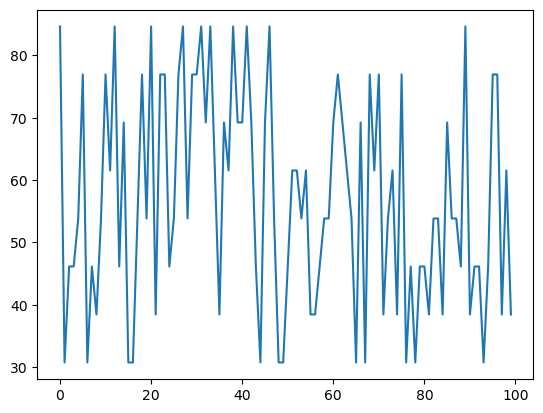

In [5]:
def QRandom(a, b):
    qubits = 3  # Set the number of qubits to 3
    q = QuantumRegister(qubits, 'q')
    circ = QuantumCircuit(q)
    c0 = ClassicalRegister(qubits, 'c0')
    circ.add_register(c0)

    for i in range(qubits):
        circ.h(q[i])

    for i in range(qubits):
        circ.measure(q[i], c0[i])

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    output = result.get_statevector(circ, decimals=5)

    n1 = 0
    n2 = 0
    n3 = 0
    for i in range(len(output)):
        if abs(output[i]) != 0:
            n1 = i
            n2 = np.real(output[i])
            n3 = np.imag(output[i])

    y = real_map(n1 + n2 + n3, -qubits, len(output) - 1 + qubits, a, b)
    plot_state_city(output)
    return y

x = []
for i in range(100):
    x.append(QRandom(0, 100))
    print(str(i) + ": " + str(QRandom(0, 100)))

plt.plot(x)
plt.show()


In [ ]:
def QRandom(a, b):
    qubits = 8  # Set the number of qubits to 3
    q = QuantumRegister(qubits, 'q')
    circ = QuantumCircuit(q)
    c0 = ClassicalRegister(qubits, 'c0')
    circ.add_register(c0)

    for i in range(qubits):
        circ.h(q[i])

    for i in range(qubits):
        circ.measure(q[i], c0[i])

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result()
    output = result.get_statevector(circ, decimals=5)

    n1 = 0
    n2 = 0
    n3 = 0
    for i in range(len(output)):
        if abs(output[i]) != 0:
            n1 = i
            n2 = np.real(output[i])
            n3 = np.imag(output[i])

    y = real_map(n1 + n2 + n3, -qubits, len(output) - 1 + qubits, a, b)
    plot_state_city(output)
    return y

x = []
for i in range(100):
    x.append(QRandom(0, 100))
    print(str(i) + ": " + str(QRandom(0, 100)))
plt.plot(x)
plt.show()

## Analysis and Conclusion

I did two trials of the algorithm itself, one using 3 qubits and one using 10. Both plots looked "random" to the naked eye. However, in trial 1, it was clearly noticeable that some values repeated, down to the 14th decimal place. In trial 2, there were fewer noticeable repeats. Upon closer analysis, it turns out that trial 1 had 8 unique values that were displayed, or 2^3 values. I wasn't able to count how many unique values showed up when 10 qubits were used, but it's very likely 2^10. While the number of unique values that the algorithm is able to come up with exponentially increases, so does the time taken to run; the first trial took about two minutes to run, while the second never actually finished on my computer after letting it run overnight.

Comparing the randomness of this algorithm to a classical algorithm could be an interesting project to do next.